# Wind farm optimisation

In [1]:
from src import optimisation as opt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
ref_data = {}

In [3]:
ref_data["wind_speed"] = [0 + 0.01 * n for n in range(3100)]
ref_data["power_curve"] = []
ref_data["weibull"] = []

In [4]:
for v in ref_data["wind_speed"]:
    ref_data["power_curve"].append(opt.ref_power_curve(v=v))
    ref_data["weibull"].append(
        opt.weibull_probability_distribution(v=v, k=2, c=10.9)
    )

In [5]:
ref_data = pd.DataFrame(ref_data)

In [6]:
ref_data.head()

,wind_speed,power_curve,weibull
0,0.00,0.0,0.000000
1,0.01,0.0,0.000168
2,0.02,0.0,0.000337
3,0.03,0.0,0.000505
4,0.04,0.0,0.000673


In [8]:
opt.annual_energy_production(n_turbines=40, k=2, c=10.9)

(2744.3805945747426, (8.702373777824526, 4.5176304119820543e-07))

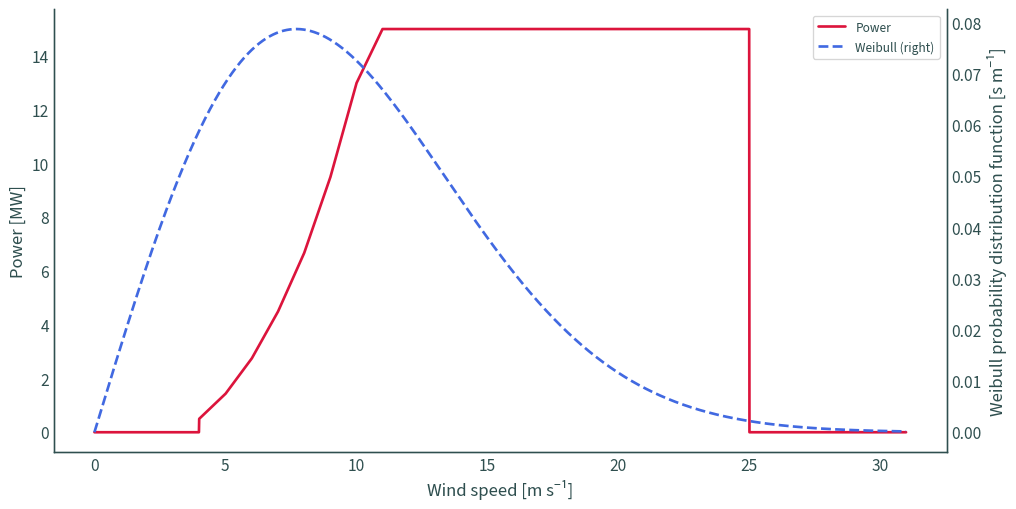

In [9]:
ax = ref_data.plot(
    x="wind_speed",
    y="power_curve",
    label="Power",
    ylabel="Power [MW]",
    linewidth=2,
    color="crimson",
    figsize=(12, 6),
)
ref_data.plot(
    x="wind_speed",
    y="weibull",
    label="Weibull",
    ylabel=(
        "Weibull probability distribution function "
        + "[s m\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}]"
    ),
    linewidth=2,
    color="royalblue",
    linestyle="dashed",
    secondary_y=True,
    ax=ax,
)
ax.set_xlabel("Wind speed [m s\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}]")
sns.despine(top=True, right=False)